## Import Library

In [3]:
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
!pip install wordcloud

## Utils

In [5]:
def show_wordcloud(data):
    words = ''
     
    for sentence in data:
     
        tokens = str(sentence).split()
         
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
         
        words += " ".join(tokens) + " "
     
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(words)
     
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
     
    plt.show()

## Load Data

In [6]:
file = open("data/quotexresponseprocessed.pkl", "rb")
df = pickle.load(file)
file.close()

In [7]:
df

,presented_quote,presented_response,emotion_fact,disagree_agree,plain_sarcasm,presented_quote_tag,presented_response_tag
0,i get a good idea however they do tend to stay...,by your own admission you havent hang out with...,feeling-based,disagreement,unsure,NN VBP DT JJ NN RB PRP VBP VB TO VB IN PRP$ JJ,IN PRP$ JJ NN PRP VBP VB RP IN NN IN DT NN CC ...
1,be sure to give your gun a big fat kiss tonigh...,actually they didnt the whole tragedy be cause...,unsure,disagreement,unsure,VB JJ TO VB PRP$ NN DT JJ NN NN NN IN PRP VBP ...,RB PRP VBP DT JJ NN VB VBN IN NN NN IN RB CD N...
2,one of the big argument against gun control be...,not quite to be more correct regard government...,fact-based,disagreement,no_sarcasm,CD IN DT JJ NN IN NN NN VB IN IN DT NN VB RB J...,RB RB TO VB RBR JJ JJ NN CC VB DT NN TO VB NN ...
3,first of all compare the b specimen in your fo...,at your servicecomparisoni couldve just circle...,unsure,disagreement,unsure,RB IN DT VBP DT NN NNS IN PRP$ NN NN TO DT JJ ...,IN PRP$ JJ NN RB VB DT JJ NN CC DT VBP PRP JJ ...
4,there be some incedents that be beyond your co...,well yes,feeling-based,agreement,no_sarcasm,RB VB DT NNS WDT VB IN PRP$ NN IN PRP VBP DT N...,RB RB
...,...,...,...,...,...,...,...
9977,the id movement form of id state that there be...,that of course be the logical fallacy know as ...,fact-based,disagreement,no_sarcasm,DT JJ NN NN IN JJ NN IN EX VB JJ NN IN DT NN I...,DT IN NN VB DT JJ NN VBP IN JJ NN DT NN PRP VB...
9978,for me it would therefore have make no differe...,it logically follow from the moral foundation ...,feeling-based,agreement,no_sarcasm,IN PRP PRP MD RB VB NN DT NN IN NNS VBP VB VBN...,PRP RB VBP IN DT JJ NN VBN RP CC PRP VBP TO JJ...
9979,good thing this argument have never be doneoh ...,and teen sex doesnt by the very nature of its ...,feeling-based,unsure,no_sarcasm,JJ NN DT NN VBP RB VB JJ NN WDT VBZ PRP MD VB ...,CC JJ NN NN IN DT JJ NN IN PRP$ NN NN IN NN DT...
9980,i know one thing anything that happen politica...,wasnt sinjin crow about his plan to take the f...,feeling-based,unsure,no_sarcasm,NN VBP CD NN NN WDT VBZ RB JJ NNS MD VB PRP RB...,NN NN NN IN PRP$ NN TO VB DT NN NN CC NN TO DT...


## Analysis

### Fact-Feeling Analysis

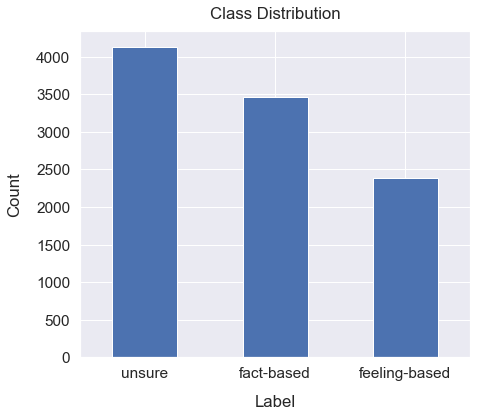

In [8]:
sns.set(font_scale=1.4)
df['emotion_fact'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Label", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Class Distribution", y=1.02);

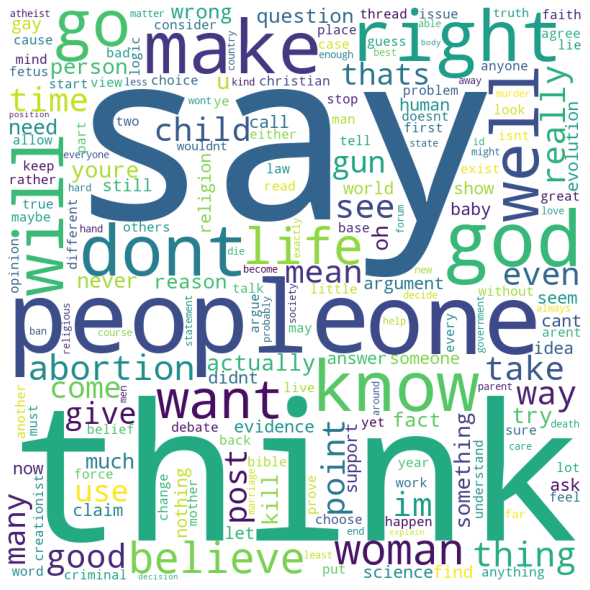

In [9]:
df_feeling = df[df['emotion_fact'] == 'feeling-based']

show_wordcloud(df_feeling['presented_response'])

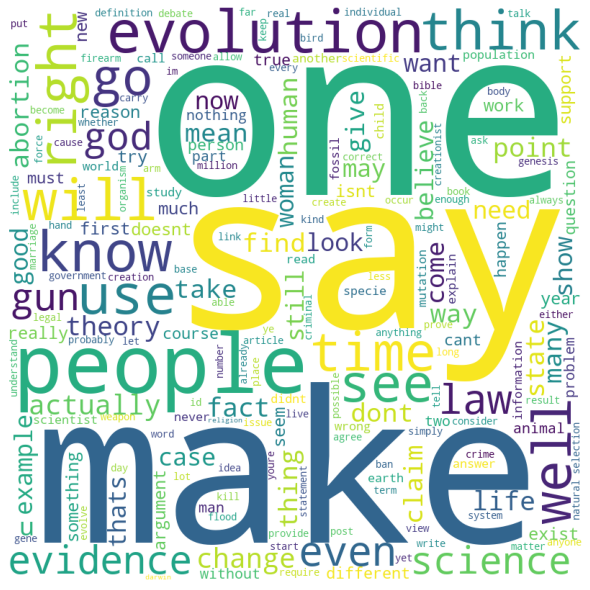

In [10]:
df_fact = df[df['emotion_fact'] == 'fact-based']
    
show_wordcloud(df_fact['presented_response'])

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2))

ngrams = vectorizer.fit_transform(df_feeling['presented_response'][:1000])
count_values = ngrams.toarray().sum(axis=0)
vocab = vectorizer.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'bigram/trigram'})

df_ngram

,frequency,bigram/trigram
0,132,it be
1,127,of the
2,112,you be
3,98,in the
4,95,be not
...,...,...
23157,1,abide after
23158,1,abduct few
23159,1,abandon you
23160,1,abandon his


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2))

ngrams = vectorizer.fit_transform(df_fact['presented_response'][:1000])
count_values = ngrams.toarray().sum(axis=0)
vocab = vectorizer.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'bigram/trigram'})

df_ngram

,frequency,bigram/trigram
0,454,of the
1,334,in the
2,287,it be
3,210,there be
4,187,be not
...,...,...
42856,1,ab mutant
42857,1,ab individual
42858,1,aa post
42859,1,aa meeting


In [19]:
df.loc[33:36, ['presented_response']]

,presented_response
33,httpwwwhomeofficegovukrdspdfshosbpdfit doesnt ...
34,what be your evidence they didnt do this remem...
35,you mean that the confiscation of the gun woul...
36,then you freely admit that you lie when you sa...


### Sarcasm Analysis

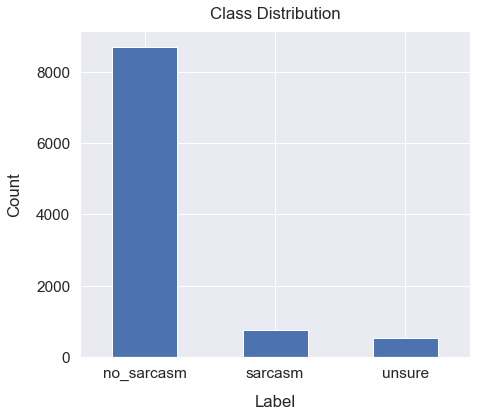

In [ ]:
sns.set(font_scale=1.4)
df['plain_sarcasm'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Label", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Class Distribution", y=1.02);

### Agreement Analysis

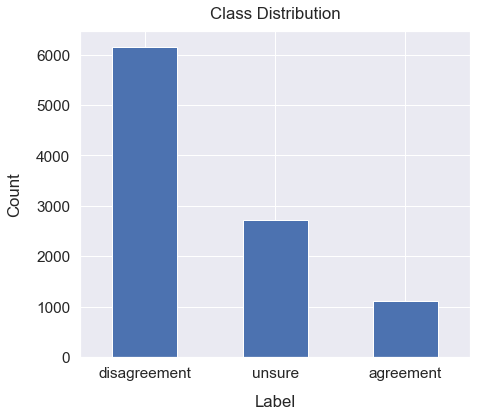

In [ ]:
sns.set(font_scale=1.4)
df['disagree_agree'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Label", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Class Distribution", y=1.02);